# Dog breed multi-class classifier

> Building a multi class image classifier with tensorflow.

## Problem

> Identifying a breed of a dog given an image of a dog.

## Data

> Since this problem is based around unstructured data, the solution would be to use deep learning/transfer learning, the data can be found [here](https://www.kaggle.com/c/dog-breed-identification/data?select=sample_submission.csv).

In [166]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np


#tensorflow version
print(f'Tensorflow version: {tf.__version__}')
#check for GPU
print(f'GPU count: {len(tf.config.list_physical_devices("GPU"))}')

Tensorflow version: 2.4.1
GPU count: 1


In [12]:
#access data(images)
#check labels of data
import pandas as pd
labels_csv = pd.read_csv('./dog_data/labels.csv')
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [14]:
#info
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


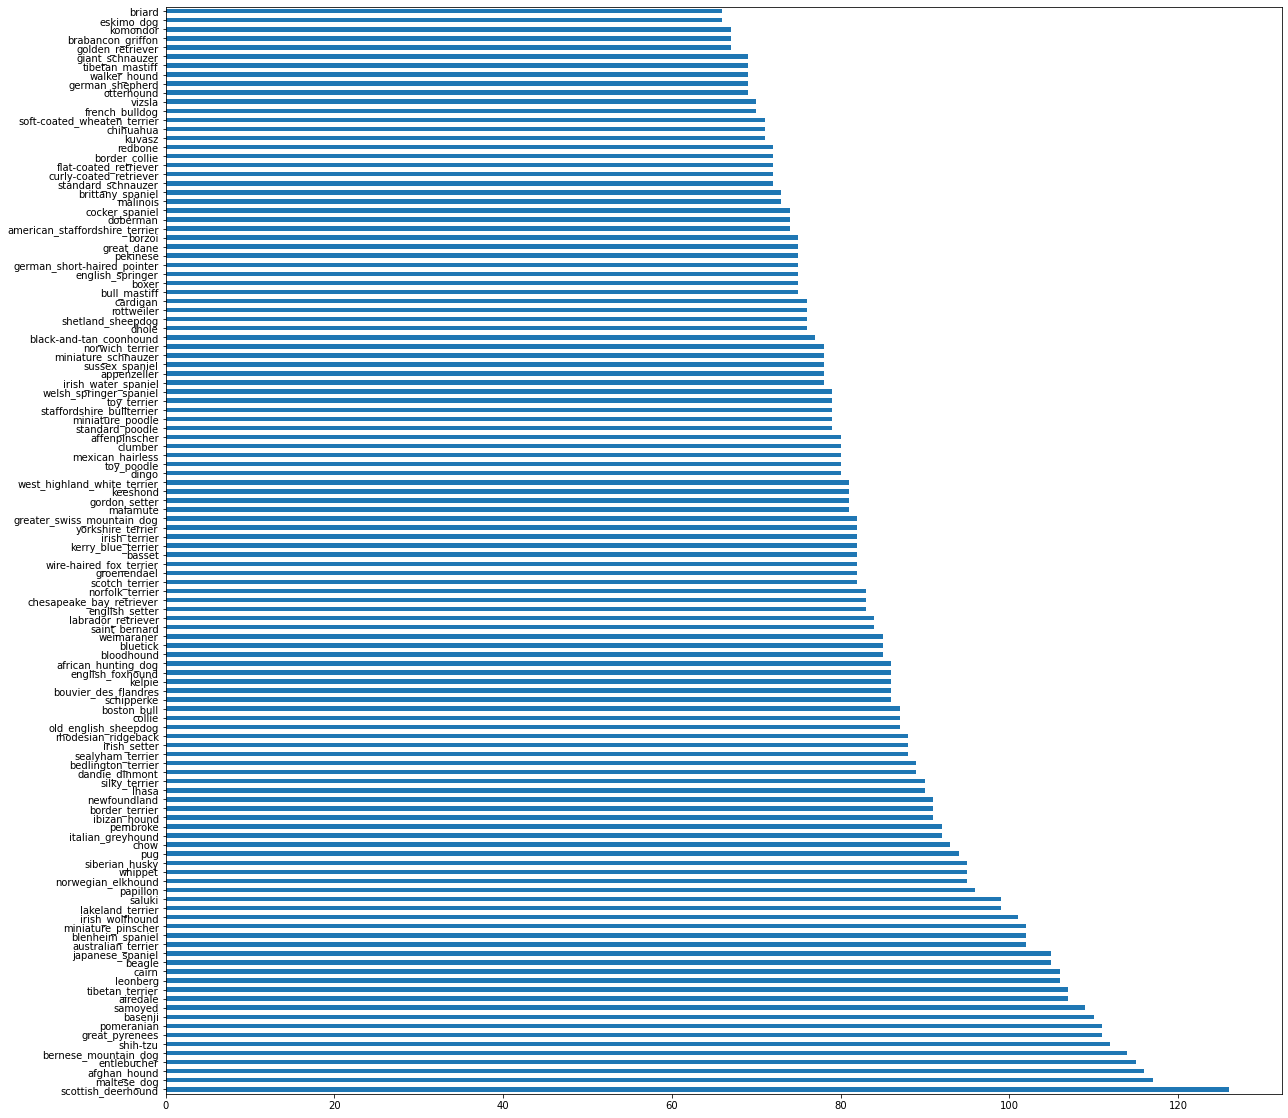

In [23]:
#how many images of each breed
labels_csv.breed.value_counts().plot(figsize=(20, 20), kind='barh');

In [27]:
labels_csv.breed.value_counts().median()

82.0

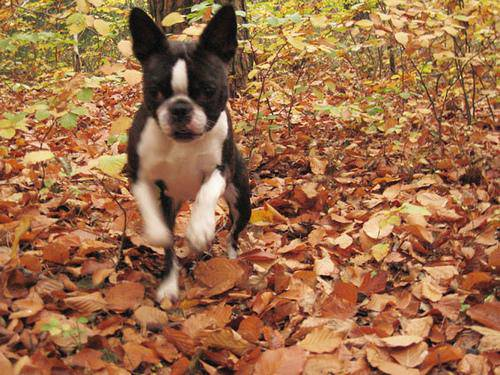

In [29]:
#preparing images
from IPython.display import Image
Image('./dog_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [31]:
#getting images and their labels
#create pathnames from image id's
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [46]:
#get correct filepath to images
train_filepaths = ["./dog_data/train/"+fname for fname in labels_csv['id']+".jpg"];
train_filepaths[:10]

['./dog_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './dog_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './dog_data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 './dog_data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 './dog_data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 './dog_data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 './dog_data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 './dog_data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 './dog_data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 './dog_data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [48]:
#check if number of filenames matches number of actual image files
import os

if len(os.listdir('./dog_data/train/')) == len(train_filepaths):
    print('continue')
else:
    print('review data')

correct


In [51]:
#prepare our labels(change breed column into numpy array)
labels = labels_csv['breed'].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [54]:
#check if number of labels = number of files
if len(labels) == len(train_filepaths):
    print('continue')
else:
    print('review data')

continue


In [89]:
#find unique labels
unique_labels = np.unique(labels)
len(unique_labels), labels_csv['breed'].describe()

(120,
 count                  10222
 unique                   120
 top       scottish_deerhound
 freq                     126
 Name: breed, dtype: object)

In [88]:
#convert each label to boolean array(which makes it unique) then one-hot encode them 
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:1] #one label

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [90]:
#creating validation set
X = filenames
y = boolean_labels

In [91]:
#start with a 1000 samples(images)

In [92]:
#set number of images to use for experiment
NUM_IMAGES = 1000

In [99]:
#split data into train and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [103]:
X_train[:2], y_train[:2]

(['./dog_data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  './dog_data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, F

In [135]:
#turning data into tensors
IMG_SIZE = 224

def process_img(img_path):
    image = tf.io.read_file(img_path) #sets tensor as string
    image = tf.image.decode_jpeg(image, channels=3) #decode image numbers
    image = tf.image.convert_image_dtype(image, tf.float32) # normalize image
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE]) #resize image
    return image
    

In [117]:
process_img(X[0])

tf.Tensor(
[[[0.41960788 0.1764706  0.        ]
  [0.5921569  0.35686275 0.16078432]
  [0.69411767 0.4666667  0.27058825]
  ...
  [0.6862745  0.56078434 0.26666668]
  [0.7411765  0.6156863  0.32156864]
  [0.8352942  0.70980394 0.4156863 ]]

 [[0.5882353  0.36078432 0.18039216]
  [0.7019608  0.47450984 0.29411766]
  [0.6431373  0.43137258 0.24705884]
  ...
  [0.654902   0.53333336 0.21960786]
  [0.67058825 0.54901963 0.23529413]
  [0.73333335 0.6117647  0.29803923]]

 [[0.5882353  0.3803922  0.21568629]
  [0.73333335 0.53333336 0.3647059 ]
  [0.6313726  0.43921572 0.27058825]
  ...
  [0.7803922  0.65882355 0.30588236]
  [0.7568628  0.63529414 0.28235295]
  [0.7843138  0.6627451  0.30980393]]

 ...

 [[0.7372549  0.47450984 0.25882354]
  [0.7254902  0.46274513 0.24705884]
  [0.7137255  0.45882356 0.24705884]
  ...
  [0.8352942  0.627451   0.4156863 ]
  [0.82745105 0.61960787 0.40784317]
  [0.81568635 0.60784316 0.39607847]]

 [[0.7254902  0.46274513 0.24705884]
  [0.7176471  0.454902   0

In [136]:
#return tuple of image and label
def get_image_label(image_path, label):
    image = process_img(image_path)
    return image, label

In [123]:
get_image_label(X[42], y[42])

tf.Tensor(
[[[0.34509805 0.5411765  0.34117648]
  [0.29411766 0.4901961  0.2901961 ]
  [0.24705884 0.43529415 0.23137257]
  ...
  [0.29803923 0.5254902  0.32941177]
  [0.29803923 0.5254902  0.3372549 ]
  [0.29411766 0.52156866 0.33333334]]

 [[0.2784314  0.47058827 0.28627452]
  [0.25490198 0.45098042 0.25882354]
  [0.24313727 0.43921572 0.24705884]
  ...
  [0.28627452 0.5137255  0.3254902 ]
  [0.2901961  0.5176471  0.32941177]
  [0.2901961  0.5176471  0.32941177]]

 [[0.21176472 0.41176474 0.2509804 ]
  [0.21960786 0.41960788 0.25882354]
  [0.24313727 0.4431373  0.28235295]
  ...
  [0.27450982 0.49803925 0.32156864]
  [0.2784314  0.5019608  0.3254902 ]
  [0.28235295 0.5058824  0.32941177]]

 ...

 [[0.00784314 0.04313726 0.03921569]
  [0.01568628 0.0509804  0.03921569]
  [0.02352941 0.05882353 0.04705883]
  ...
  [0.4666667  0.43921572 0.25882354]
  [0.4901961  0.4666667  0.2784314 ]
  [0.47450984 0.45098042 0.2627451 ]]

 [[0.         0.01176471 0.02745098]
  [0.         0.02745098 0

(None,
 <tf.Tensor: shape=(120,), dtype=bool, numpy=
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, Fa

In [140]:
#turn all data into batches
BATCH_SIZE = 32
def create_data_batches(X, y=None,batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print('Creating test data batches...')
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        data_batch = data.map(process_image).batch(batch_size)
        print('Done')
        return data_batch
    
    if valid_data:
        print('Creating validation data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data.map(get_image_label).batch(batch_size)
        print('Done')
        return data_batch
    
    if not valid_data and not test_data:
        print('Creating training data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data = data.shuffle(buffer_size=len(X))
        data = data.map(get_image_label)
        data_batch = data.batch(batch_size)
        print('Done')
        return data_batch
        

In [141]:
# create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Done
Creating validation data batches...
Done


In [142]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [145]:
#visualize data batches
import matplotlib.pyplot as plt

def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for image in range(25):
        ax = plt.subplot(5, 5, image+1)
        plt.imshow(images[image])
        plt.title(unique_labels[labels[image].argmax()])
        plt.axis('off')

In [152]:
train_images, train_labels = next(train_data.as_numpy_iterator())

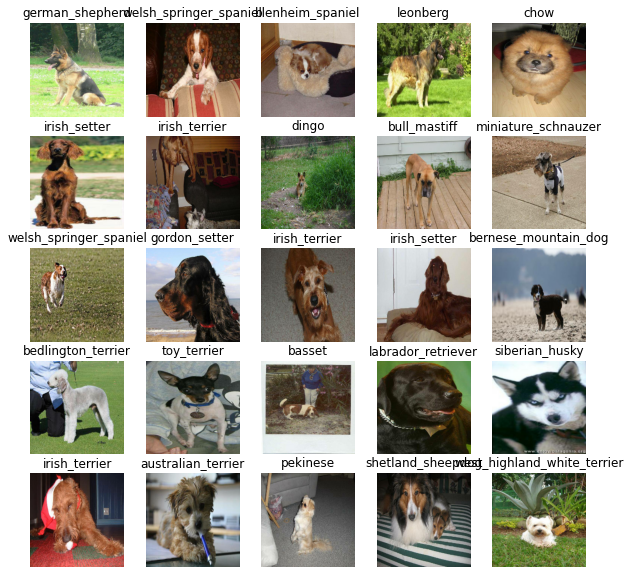

In [154]:
show_25_images(train_images, train_labels)

In [156]:
# inputs and outputs
train_data, val_data

(<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>)

In [161]:
#building a model

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channel
OUTPUT_SHAPE = len(unique_labels)

MODEL_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [173]:
#create keras deep learning model
def create_sequential_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), 
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                             activation='softmax')
    ])
    
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    
    model.build(INPUT_SHAPE)
    
    return model

In [174]:
model = create_sequential_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1001)              3540265   
_________________________________________________________________
dense_3 (Dense)              (None, 120)               120240    
Total params: 3,660,505
Trainable params: 120,240
Non-trainable params: 3,540,265
_________________________________________________________________
